In [12]:
import sys
import numpy as np
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [13]:
from importlib import reload
from src.classifiers_davidjames9610.test_a.config import config_location
import importlib
import src.classifiers_davidjames9610.test_a.config as base_config
reload(base_config)
config = importlib.import_module(base_config.config_location)
reload(config)
print(config.basedir)
import pandas as pd
import time

/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data


In [14]:
import pickle
import d_classifiers_to_results
reload(d_classifiers_to_results)
import src.misc_davidjames9610.utils as utils
reload(utils)

sls = pickle.load(open(config.samples_labels,'rb'))
features = utils.folder_pickles_to_dict(config.basedir + '/features')
classifiers = utils.folder_pickles_to_dict(config.basedir + '/classifiers')


loading lp_GaussNoise_SNR20.pickle
loading mfcc_GaussNoise_SNR60.pickle
loading mfcc_GaussNoise_SNR40.pickle
loading lp_GaussNoise_SNR10.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading mfcc_None_None.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading lp_None_None.pickle
loading lp_GaussNoise_SNR40.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading mfcc_GaussNoise_SNR10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading lp_GaussNoise_SNR60.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading mfcc_GaussNoise_SNR20.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading GMMHMM.pickle
loading GaussianHMM.pickle
loading fhmm.pickle


In [15]:
! find . -name ".DS_Store" -type f -delete

In [16]:
import os
# dataframes_arrays = {}
# dataframe = {}
cols_order = ['model','feature', 'SNR', 'noise', 'time', 'acc', 'precision', 'recall']
df_array = {}

classifier_approaches = (
'classification_annotations',
# 'classification_buffer',
'classification_annotations_valg',
# 'classification_buffer_valg'
)

for classifier_approach in os.listdir(config.basedir + '/results'):
    if classifier_approach in classifier_approaches:
        row_array = []
        approach_approach_path = os.path.join(config.basedir + '/results', classifier_approach)
        for classifier_type in os.listdir(approach_approach_path):
            classifier_type_path = os.path.join(approach_approach_path, classifier_type)
            classifier_results = utils.folder_pickles_to_dict(classifier_type_path)
            for feature_key in classifier_results:
                curr_stats = classifier_results[feature_key]['stats']

                row = curr_stats.copy()
                row['model'] = classifier_type
                row['feature'] = feature_key.split('_')[0]
                if len(feature_key.split('_')) > 1:
                    snr = feature_key.split('_')[-1].replace('SNR','')
                    if snr != 'None':
                        snr = int(snr)
                        row['SNR'] = snr
                    row['noise'] = ' '.join(feature_key.split('_')[1:-1])
                row['time'] = classifier_results[feature_key]['time']
                row_array.append(row)
        curr_df = pd.DataFrame(row_array)
        curr_df = curr_df[cols_order]
        curr_df = curr_df.sort_values(['noise', 'SNR','model'], ascending=[True, True, True]).copy()
        # re-order any None to top
        rows_to_move = curr_df[curr_df['noise'] == 'None']
        rest_of_df = curr_df[curr_df['noise'] != 'None']
        df_rounded = pd.concat([rows_to_move, rest_of_df])
        df_rounded = df_rounded.round(decimals=3).copy()
        df_replaced_values = df_rounded.replace({'GaussNoise': 'Gaussian Noise', 'RealNoise UNDER WATER DRONE': 'Real Noise', 'lp': 'log-power', 'fhmm': 'FHMM'})

        df_array[classifier_approach] = df_replaced_values
        new_dir = config.basedir + '//csvs'
        utils.create_directory_if_not_exists(new_dir, False)

        df_array[classifier_approach].to_csv(new_dir + '//' + classifier_approach + '.csv')

# find . -name ".DS_Store" -type f -delete

loading lp_GaussNoise_SNR20.pickle
loading lp_GaussNoise_SNR10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading lp_GaussNoise_SNR40.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading lp_GaussNoise_SNR60.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading lp_GaussNoise_SNR20.pickle
loading lp_GaussNoise_SNR10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading lp_None_None.pickle
loading lp_GaussNoise_SNR40.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading lp_GaussNoise_SNR60.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading mfcc_GaussNoise_SNR60.pickle
loading mfcc_GaussNoise_SNR40.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading mfcc_None_None.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading mfcc_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading mf

$ PPV = TP / (TP + FP) $
$ TPR = TP / (TP + FN) $

In [5]:
# save as csvs
# for key in df_array:
#     new_dir = config.basedir + '//csvs'
#     utils.create_directory_if_not_exists(new_dir, False)
#     df_array[key].to_csv(new_dir + '//' + key + '.csv')

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands//csvs' already exists, removing old files:  False
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands//csvs' already exists, removing old files:  False
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands//csvs' already exists, removing old files:  False
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/speech_commands//csvs' already exists, removing old files:  False


saving plots for: classification_annotations
Gaussian Noise
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data//bar_plots//classification_annotations' already exists, removing old files:  False


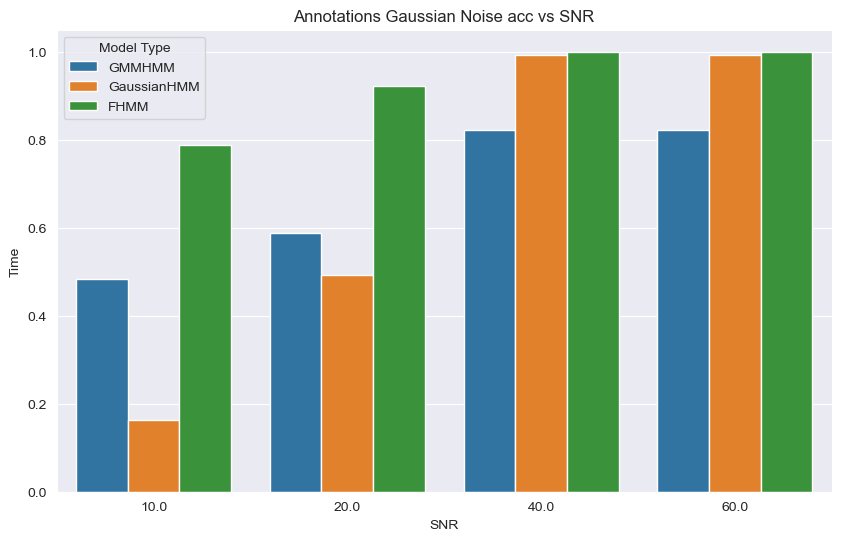

Real Noise
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data//bar_plots//classification_annotations' already exists, removing old files:  False


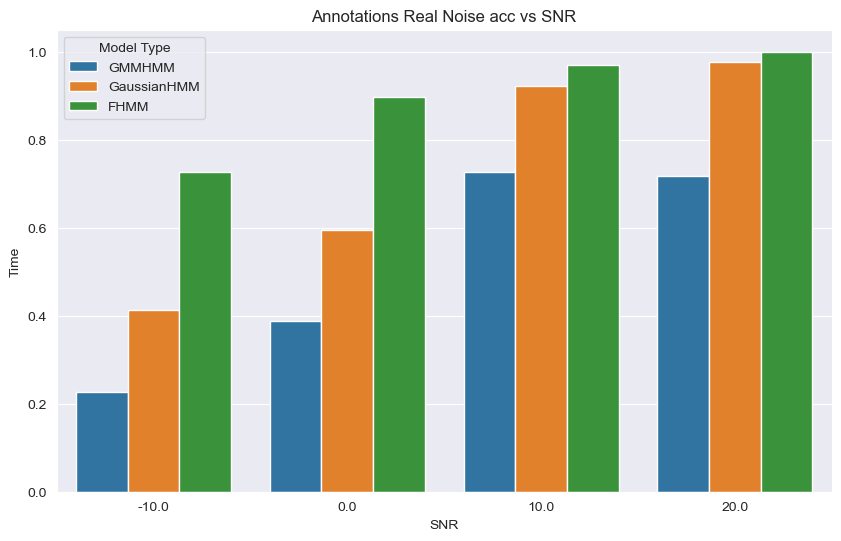

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

classifier_type_dict = {
    'classification_annotations': 'Annotations',
    # 'classification_buffer': 'Buffer',
    # 'classification_annotations_valg': 'Viterbi',
    # 'classification_buffer_valg': 'Viterbi Buffer'
}

noise_type_dict = {
    'GaussNoise': 'Gaussian Noise',
    'RealNoise UNDER WATER DRONE': 'Under Water Drone'
}

measure = 'acc'

for arr_key in df_array:
    if arr_key in classifier_type_dict:
        curr_df = df_array[arr_key]
        print('saving plots for:', arr_key)
        for noise in curr_df['noise'].unique():
            if noise != 'None':
                print(noise)
                curr_df_noise = curr_df[(curr_df['noise'] == noise)]
                save_key = arr_key + '_' + noise + '_' + measure
                title = classifier_type_dict[arr_key] + ' ' + noise

                plt.figure(figsize=(10, 6))
                sns.barplot(x='SNR', y=measure, hue='model', data=curr_df_noise, errorbar=None)

                # Customize the plot
                plt.title(title + ' ' + measure + ' vs SNR')
                plt.xlabel('SNR')
                plt.ylabel('Time')
                plt.legend(title='Model Type')
                new_dir = config.basedir + '//bar_plots//' + arr_key
                utils.create_directory_if_not_exists(new_dir, False)
                plt.savefig(new_dir + '//' + save_key + '.png')
                # Show the plot
                plt.show()
